In [35]:
import sys
sys.path.append("../granger-busca")
sys.path.append("../framework")
import os
import numpy as np
from gb import simulate, GrangerBusca
import tick
import tick.hawkes as hk
from random_search import *
import matplotlib.pyplot as plt
from pp_metrics import *
from time import time
import pp_models
import gen_simulation

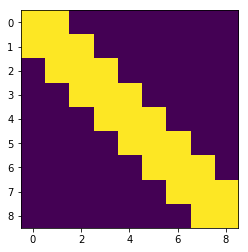

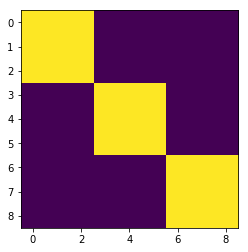

In [15]:
def save_model(modelName, adjacency, baselines, foldername, sim):
    filepath = "results/"+foldername+"/"+modelName+"/"

    if not os.path.exists(filepath):
        os.makedirs(filepath)

    np.save(filepath+"/adjacency_"+str(sim), adjacency)
    np.save(filepath+"/baselines"+str(sim), baselines)


a2 = gen_simulation.gen_alpha3(d, d//3)
plt.imshow(a2)
plt.show()


# Simulation 1

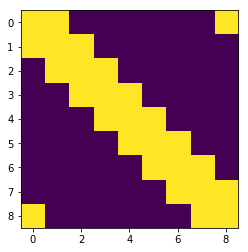

----------------------------------------
Launching simulation using SimuHawkes...
Done simulating using SimuHawkes in 2.37e-02 seconds.


In [32]:
def simulate_hawkes_exp(Alpha, n_events):
    d = len(Alpha)
    Beta = np.ones(shape = (d,d))
    n_points = d * n_events
    mu = np.ones(shape = d) * 0.1
    kernels = [[hk.HawkesKernelExp(Alpha[i][j],Beta[i][j]) for j in range(len(Alpha[i]))] for i in range(len(Alpha))]
    h = hk.SimuHawkes(kernels=kernels, baseline=list(mu), max_jumps=n_points)
    h.simulate()
    return h.timestamps

d = 9
a1 = np.zeros((d,d))
for i in range(d):
    for j in range(d):
        if i==j or (i+1==j) or (i==(d-1) and j==0):
            a1[i][j] = 0.3
            a1[j][i] = 0.3
plt.imshow(a1)
plt.show()

timestmaps = simulate_hawkes_exp(a1,1000)

/usr/local/lib/python3.6/dist-packages/tick/base/learner/learner_optim.py:378: RuntimeWarning: You cannot set C for penalty "none"
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/tensor_util.py:440: ComplexWarning: Casting complex values to real discards the imaginary part
  nparray = values.astype(dtype.as_numpy_dtype)


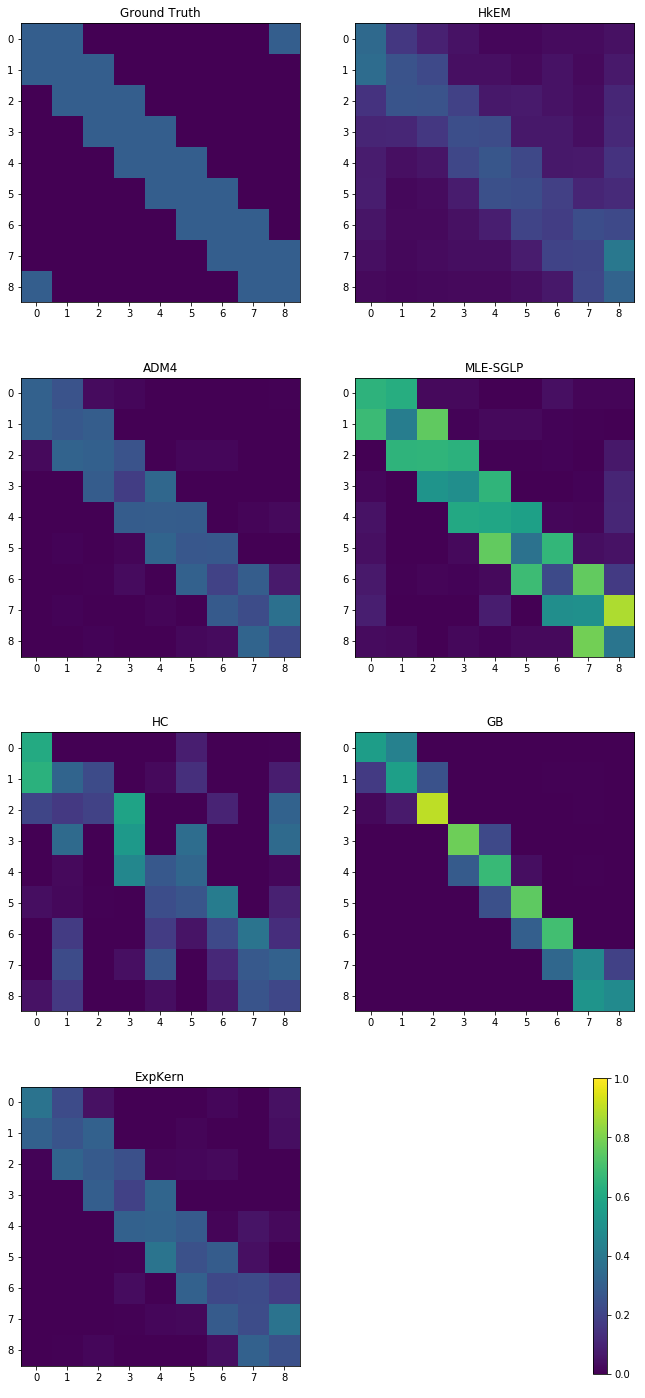

In [43]:
model_em = pp_models.HkEM()
model_em.optimize_params(timestamps, n_iter=50)

model_adm4 = pp_models.ADM4()
model_adm4.optimize_params(timestamps, n_iter=100)

model_expkern = pp_models.ExpKern()
model_expkern.optimize_params(timestamps, n_iter=100)

model_hc = pp_models.HC()
model_hc.optimize_params(timestamps, n_iter=100)

model_gb = pp_models.Wold()
model_gb.optimize_params(timestamps, n_iter=100)


fig, ax = plt.subplots(4, 2, figsize = (11,25))
im = ax[0][0].imshow(a1,vmin=0,vmax=1)
ax[0][0].set_title("Ground Truth")

model_em.fit(timestamps)
Alpha = model_em.get_kernel_norms()
mu = model_em.get_baselines()
ax[0][1].imshow(Alpha,vmin=0,vmax=1)
ax[0][1].set_title("HkEM")

model_adm4.fit(timestamps)
Alpha = model_adm4.get_kernel_norms()
mu = model_adm4.get_baselines()
ax[1][0].imshow(Alpha,vmin=0,vmax=1)
ax[1][0].set_title("ADM4")

model_sg = pp_models.SG()
model_sg.fit(timestamps)
Alpha = model_sg.get_kernel_norms()
mu = model_sg.get_baselines()
ax[1][1].imshow(Alpha,vmin=0,vmax=1)
ax[1][1].set_title("MLE-SGLP")

model_hc.fit(timestamps)
Alpha = model_hc.get_kernel_norms()
mu = model_hc.get_baselines()
ax[2][0].imshow(Alpha,vmin=0,vmax=1)
ax[2][0].set_title("HC")

model_gb.fit(timestamps)
Alpha = model_gb.get_kernel_norms()
mu = model_gb.get_baselines()
ax[2][1].imshow(Alpha,vmin=0,vmax=1)
ax[2][1].set_title("GB")

model_expkern.fit(timestamps)
Alpha = model_expkern.get_kernel_norms()
mu = model_expkern.get_baselines()
ax[3][0].imshow(Alpha,vmin=0,vmax=1)
ax[3][0].set_title("ExpKern")

ax[-1][-1].axis('off')
fig.colorbar(im, ax=ax[-1][-1])
plt.show()


### Simulation 2 Plaw

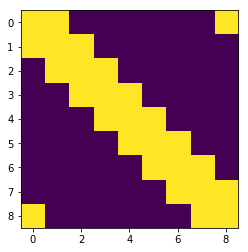

----------------------------------------
Launching simulation using SimuHawkes...
Done simulating using SimuHawkes in 3.85e+01 seconds.


In [58]:
d = 9
a1 = np.zeros((d,d))
for i in range(d):
    for j in range(d):
        if i==j or (i+1==j) or (i==(d-1) and j==0):
            a1[i][j] = 0.2
            a1[j][i] = 0.2
plt.imshow(a1)
plt.show()

Alpha = a1
d = len(Alpha)
Beta = np.ones(shape = (d,d)) * 2
n_points = d * n_events
mu = np.ones(shape = d) * 0.1
kernels = [[hk.HawkesKernelPowerLaw  (Alpha[i][j], 1.5, Beta[i][j]) for j in range(len(Alpha[i]))] for i in range(len(Alpha))]
h = hk.SimuHawkes(kernels=kernels, baseline=list(mu), max_jumps=n_points)
h.simulate()
timestamps = h.timestamps

/usr/local/lib/python3.6/dist-packages/tick/base/learner/learner_optim.py:378: RuntimeWarning: You cannot set C for penalty "none"
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/tensor_util.py:440: ComplexWarning: Casting complex values to real discards the imaginary part
  nparray = values.astype(dtype.as_numpy_dtype)


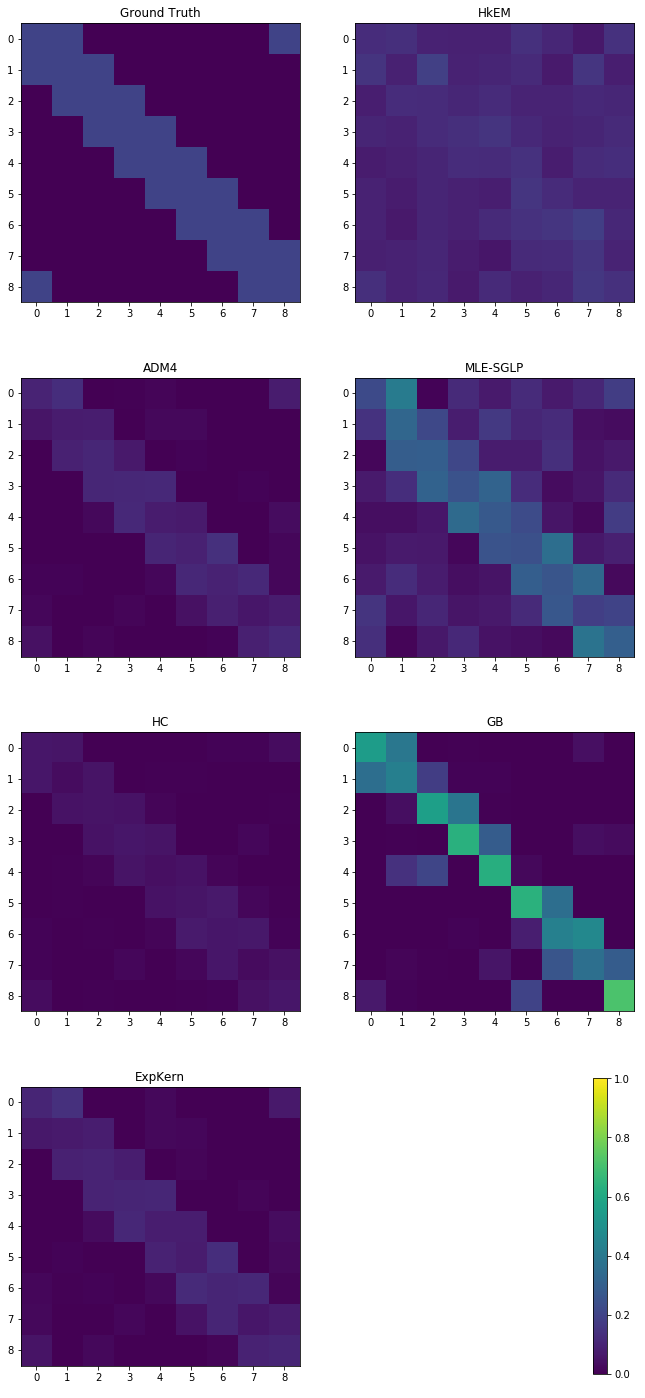

In [59]:
models = ["HkEM", "ADM4", "SG", "Cumulant", "Granger", "ExpKern"]

results_sqe = [[] for i in models]
results_musqe = [[] for i in models]

model_em = pp_models.HkEM()
model_em.optimize_params(timestamps, n_iter=50)

model_adm4 = pp_models.ADM4()
model_adm4.optimize_params(timestamps, n_iter=100)

model_expkern = pp_models.ExpKern()
model_expkern.optimize_params(timestamps, n_iter=100)

model_hc = pp_models.HC()
model_hc.optimize_params(timestamps, n_iter=100)

model_gb = pp_models.Wold()
model_gb.optimize_params(timestamps, n_iter=100)


fig, ax = plt.subplots(4, 2, figsize = (11,25))
im = ax[0][0].imshow(a1,vmin=0,vmax=1)
ax[0][0].set_title("Ground Truth")

model_em.fit(timestamps)
Alpha = model_em.get_kernel_norms()
mu = model_em.get_baselines()
ax[0][1].imshow(Alpha,vmin=0,vmax=1)
ax[0][1].set_title("HkEM")

model_adm4.fit(timestamps)
Alpha = model_adm4.get_kernel_norms()
mu = model_adm4.get_baselines()
ax[1][0].imshow(Alpha,vmin=0,vmax=1)
ax[1][0].set_title("ADM4")

model_sg = pp_models.SG()
model_sg.fit(timestamps)
Alpha = model_sg.get_kernel_norms()
mu = model_sg.get_baselines()
ax[1][1].imshow(Alpha,vmin=0,vmax=1)
ax[1][1].set_title("MLE-SGLP")

model_hc.fit(timestamps)
Alpha = model_hc.get_kernel_norms()
mu = model_hc.get_baselines()
ax[2][0].imshow(Alpha,vmin=0,vmax=1)
ax[2][0].set_title("HC")

model_gb.fit(timestamps)
Alpha = model_gb.get_kernel_norms()
mu = model_gb.get_baselines()
ax[2][1].imshow(Alpha,vmin=0,vmax=1)
ax[2][1].set_title("GB")

model_expkern.fit(timestamps)
Alpha = model_expkern.get_kernel_norms()
mu = model_expkern.get_baselines()
ax[3][0].imshow(Alpha,vmin=0,vmax=1)
ax[3][0].set_title("ExpKern")

ax[-1][-1].axis('off')
fig.colorbar(im, ax=ax[-1][-1])
plt.show()


### Simulation 3 

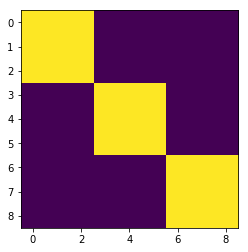

----------------------------------------
Launching simulation using SimuHawkes...
Done simulating using SimuHawkes in 2.50e-01 seconds.


In [65]:
def simulate_hawkes_exp(Alpha, n_events):
    d = len(Alpha)
    Beta = np.ones(shape = (d,d))
    n_points = d * n_events
    mu = np.ones(shape = d) * 0.1
    kernels = [[hk.HawkesKernelExp(Alpha[i][j],Beta[i][j]) for j in range(len(Alpha[i]))] for i in range(len(Alpha))]
    h = hk.SimuHawkes(kernels=kernels, baseline=list(mu), max_jumps=n_points)
    h.simulate()
    return h.timestamps


a2 = gen_simulation.gen_alpha3(d, d//3)
plt.imshow(a2)
plt.show()


timestamps = simulate_hawkes_exp(a2,1000)

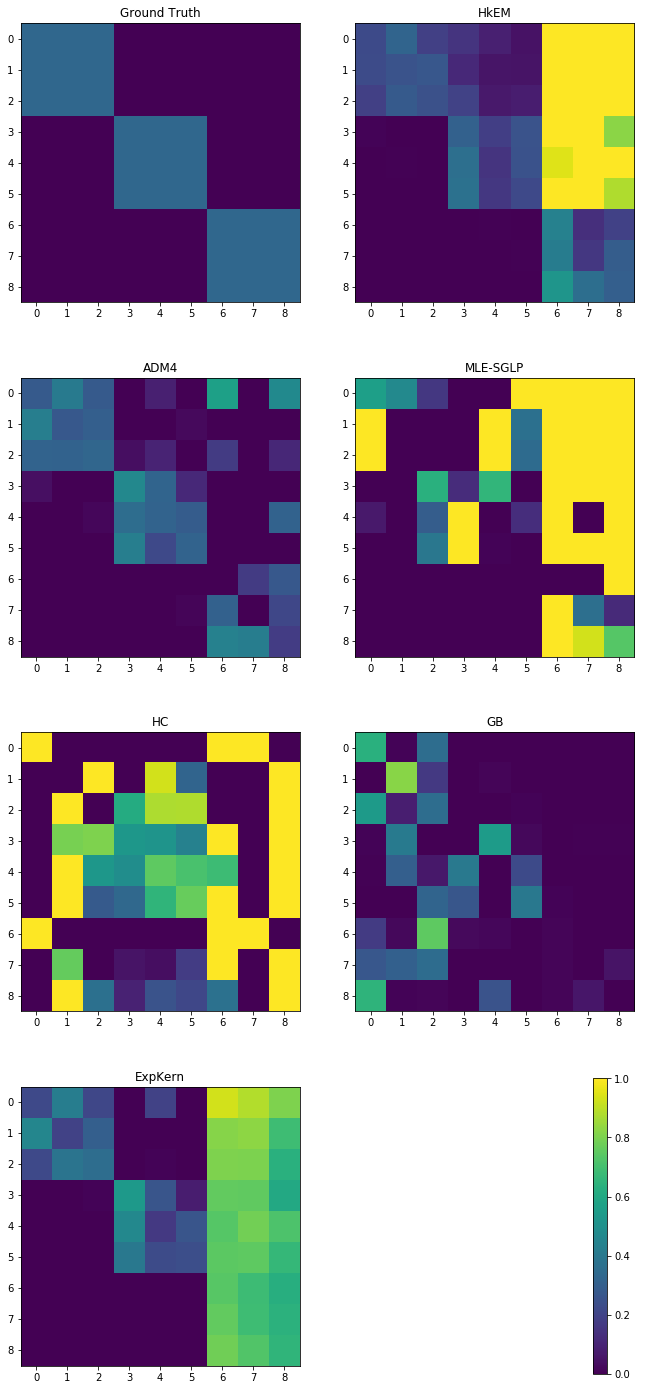

In [67]:
'''model_em = pp_models.HkEM()
model_em.optimize_params(timestamps, n_iter=50)

model_adm4 = pp_models.ADM4()
model_adm4.optimize_params(timestamps, n_iter=100)

model_expkern = pp_models.ExpKern()
model_expkern.optimize_params(timestamps, n_iter=100)
'''
model_hc = pp_models.HC()
model_hc.optimize_params(timestamps, n_iter=100)

model_gb = pp_models.Wold()
model_gb.optimize_params(timestamps, n_iter=100)


fig, ax = plt.subplots(4, 2, figsize = (11,25))
im = ax[0][0].imshow(a2,vmin=0,vmax=1)
ax[0][0].set_title("Ground Truth")

model_em.fit(timestamps)
Alpha = model_em.get_kernel_norms()
mu = model_em.get_baselines()
ax[0][1].imshow(Alpha,vmin=0,vmax=1)
ax[0][1].set_title("HkEM")

model_adm4.fit(timestamps)
Alpha = model_adm4.get_kernel_norms()
mu = model_adm4.get_baselines()
ax[1][0].imshow(Alpha,vmin=0,vmax=1)
ax[1][0].set_title("ADM4")

model_sg = pp_models.SG()
model_sg.fit(timestamps)
Alpha = model_sg.get_kernel_norms()
mu = model_sg.get_baselines()
ax[1][1].imshow(Alpha,vmin=0,vmax=1)
ax[1][1].set_title("MLE-SGLP")

model_hc.fit(timestamps)
Alpha = model_hc.get_kernel_norms()
mu = model_hc.get_baselines()
ax[2][0].imshow(Alpha,vmin=0,vmax=1)
ax[2][0].set_title("HC")

model_gb.fit(timestamps)
Alpha = model_gb.get_kernel_norms()
mu = model_gb.get_baselines()
ax[2][1].imshow(Alpha,vmin=0,vmax=1)
ax[2][1].set_title("GB")

model_expkern.fit(timestamps)
Alpha = model_expkern.get_kernel_norms()
mu = model_expkern.get_baselines()
ax[3][0].imshow(Alpha,vmin=0,vmax=1)
ax[3][0].set_title("ExpKern")

ax[-1][-1].axis('off')
fig.colorbar(im, ax=ax[-1][-1])
plt.show()


### Simulation 4

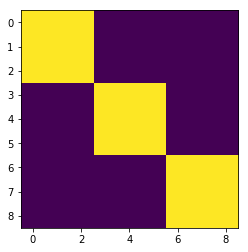

----------------------------------------
Launching simulation using SimuHawkes...
Done simulating using SimuHawkes in 3.84e+01 seconds.


In [62]:
a2 = gen_simulation.gen_alpha3(d, d//3)
plt.imshow(a2)
plt.show()

Alpha = a2
d = len(Alpha)
Beta = np.ones(shape = (d,d)) * 2
n_points = d * n_events
mu = np.ones(shape = d) * 0.1
kernels = [[hk.HawkesKernelPowerLaw  (Alpha[i][j], 1.5, Beta[i][j]) for j in range(len(Alpha[i]))] for i in range(len(Alpha))]
h = hk.SimuHawkes(kernels=kernels, baseline=list(mu), max_jumps=n_points)
h.simulate()
timestamps = h.timestamps

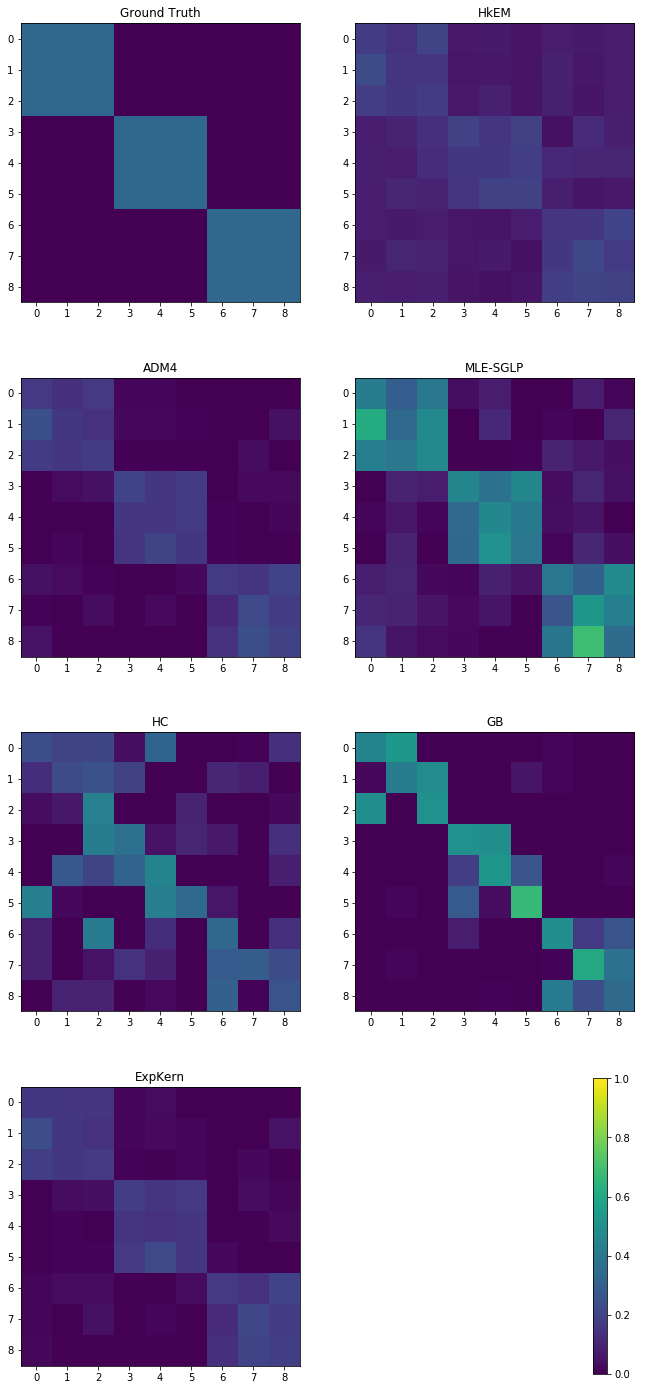

In [64]:
model_em = pp_models.HkEM()
model_em.optimize_params(timestamps, n_iter=50)

model_adm4 = pp_models.ADM4()
model_adm4.optimize_params(timestamps, n_iter=100)

model_expkern = pp_models.ExpKern()
model_expkern.optimize_params(timestamps, n_iter=100)

model_hc = pp_models.HC()
model_hc.optimize_params(timestamps, n_iter=100)

model_gb = pp_models.Wold()
model_gb.optimize_params(timestamps, n_iter=100)


fig, ax = plt.subplots(4, 2, figsize = (11,25))
im = ax[0][0].imshow(a2,vmin=0,vmax=1)
ax[0][0].set_title("Ground Truth")

model_em.fit(timestamps)
Alpha = model_em.get_kernel_norms()
mu = model_em.get_baselines()
ax[0][1].imshow(Alpha,vmin=0,vmax=1)
ax[0][1].set_title("HkEM")

model_adm4.fit(timestamps)
Alpha = model_adm4.get_kernel_norms()
mu = model_adm4.get_baselines()
ax[1][0].imshow(Alpha,vmin=0,vmax=1)
ax[1][0].set_title("ADM4")

model_sg = pp_models.SG()
model_sg.fit(timestamps)
Alpha = model_sg.get_kernel_norms()
mu = model_sg.get_baselines()
ax[1][1].imshow(Alpha,vmin=0,vmax=1)
ax[1][1].set_title("MLE-SGLP")

model_hc.fit(timestamps)
Alpha = model_hc.get_kernel_norms()
mu = model_hc.get_baselines()
ax[2][0].imshow(Alpha,vmin=0,vmax=1)
ax[2][0].set_title("HC")

model_gb.fit(timestamps)
Alpha = model_gb.get_kernel_norms()
mu = model_gb.get_baselines()
ax[2][1].imshow(Alpha,vmin=0,vmax=1)
ax[2][1].set_title("GB")

model_expkern.fit(timestamps)
Alpha = model_expkern.get_kernel_norms()
mu = model_expkern.get_baselines()
ax[3][0].imshow(Alpha,vmin=0,vmax=1)
ax[3][0].set_title("ExpKern")

ax[-1][-1].axis('off')
fig.colorbar(im, ax=ax[-1][-1])
plt.show()
